# GRSW observations notebook

This notebook shows how to access the summary table of the observations data compiled for the GRSW workshop.
It require to pull a python package to access easily the data stored on [DACE](https://dace.unige.ch/dashboard/)

### Importing useful functions

First we need to import the function needed for the notebook

In [1]:
import os
import sys
from pathlib import Path
import pandas as pd


# add the parent directory to the path so we can import the module
parent_of_current_working_directory = Path(os.getcwd()).resolve().parent
sys.path.insert(0, parent_of_current_working_directory.as_posix())
from src.ResonantState.data_download import get_metadata_observations, download_samples
from src.ResonantState.analyse_samples import *

We can download the metatable to have a look on the available observations samples

In [2]:
dataframe_observations = get_metadata_observations()
dataframe_observations.head()

,planet_name,star_name,analysis_id,contact_mail,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,eccentricity_prior,methods,instruments,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
0,K00972.01,K00972,0,darin_ragozzine@byu.edu,1,-1,13.119837,3.228469,0.064462,1.602344,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
1,K00972.02,K00972,0,darin_ragozzine@byu.edu,1,-1,7.821838,1.040388,0.459848,1.602344,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2,K01239.01,K01239,0,darin_ragozzine@byu.edu,1,-1,0.783274,1.454645,7.688309,0.965796,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
3,K01239.02,K01239,0,darin_ragozzine@byu.edu,1,-1,3.174604,1.488855,8.795811,0.965796,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
4,K01884.01,K01884,0,darin_ragozzine@byu.edu,1,-1,23.096662,4.063375,8.459971,0.832291,...,uniform in sqrt(e),photo-dynamics,Kepler,KMDC_TBD,PhoDyMM,See README.txt for more information.,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


We can have a look on the available columns:

In [3]:
dataframe_observations.head(0).T

""
planet_name
star_name
analysis_id
contact_mail
default
robustness
period_days
radius_planet_r_earth
mass_planet_m_earth
mass_star_m_sun


Let's list the list of analysed systems:

In [4]:
dataframe_observations["star_name"].unique()

array(['K00972', 'K01239', 'K01884', 'K02093', 'K02357', 'K02421',
       'K02449', 'K02554', 'K02610', 'K02696', 'K02840', 'K02949',
       'K02972', 'K03029', 'K03083', 'K03111', 'K03196', 'K03209',
       'K03340', 'K03341', 'K03395', 'K03401', 'K03420', 'K03462',
       'K03495', 'K04021', 'K04136', 'K04149', 'K04287', 'K04307',
       'K04421', 'K04435', 'K04504', 'K04526', 'K04535', 'K04541',
       'K04567', 'K04577', 'K04647', 'K04657', 'K04700', 'K04773',
       'K04782', 'K04846', 'K04871', 'K04896', 'K04913', 'K05007',
       'K06093', 'K06103', 'K06120', 'K06178', 'K06182', 'K06191',
       'K06209', 'K06245', 'K06259', 'K06355', 'K07117', 'K07685',
       'Kepler-10', 'Kepler-100', 'Kepler-1006', 'Kepler-101',
       'Kepler-1010', 'Kepler-1014', 'Kepler-102', 'Kepler-103',
       'Kepler-1038', 'Kepler-104', 'Kepler-1042', 'Kepler-1047',
       'Kepler-105', 'Kepler-1050', 'Kepler-1052', 'Kepler-1056',
       'Kepler-106', 'Kepler-1065', 'Kepler-1067', 'Kepler-107',
     

Lets keep only the analysis of the three TOI systems:

In [5]:
dataframe_observations_onlyTOI = dataframe_observations[dataframe_observations["star_name"].isin(['TOI-1130', 'TOI-1338', 'TOI-1136'])]

In [6]:
dataframe_observations_onlyTOI.head()

,planet_name,star_name,analysis_id,contact_mail,default,robustness,period_days,radius_planet_r_earth,mass_planet_m_earth,mass_star_m_sun,...,eccentricity_prior,methods,instruments,bibtex,code_used,other_remarks,metadata_file,additional_info,readme_file,url_of_samples
2076,TOI-1130 b,TOI-1130,0,luca.borsato@inaf.it,1,1,4.074335,3.653106,19.786957,0.744293,...,square-root-uniform,"photo-dynamics, RV","TESS, ASTEP+, CHEOPS, LCO-SS0, LCO-SAAO, LCO-C...",2024A&A...689A..52B,"2014A&A...571A..38B, 2024A&A...689A..52B",NaN,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2077,TOI-1130 c,TOI-1130,0,luca.borsato@inaf.it,1,1,8.350236,12.987186,334.380797,0.744293,...,square-root-uniform,"photo-dynamics, RV","TESS, ASTEP+, CHEOPS, LCO-SS0, LCO-SAAO, LCO-C...",2024A&A...689A..52B,"2014A&A...571A..38B, 2024A&A...689A..52B",NaN,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2078,TOI-1130 b,TOI-1130,1,luca.borsato@inaf.it,1,1,4.074333,3.654603,19.788273,0.744207,...,square-root-uniform,"photo-dynamics, RV","TESS, ASTEP+, CHEOPS, LCO-SS0, LCO-SAAO, LCO-C...",2024A&A...689A..52B,"2014A&A...571A..38B, 2024A&A...689A..52B",NaN,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2079,TOI-1130 c,TOI-1130,1,luca.borsato@inaf.it,1,1,8.350236,12.990115,334.195151,0.744207,...,square-root-uniform,"photo-dynamics, RV","TESS, ASTEP+, CHEOPS, LCO-SS0, LCO-SAAO, LCO-C...",2024A&A...689A..52B,"2014A&A...571A..38B, 2024A&A...689A..52B",NaN,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...
2080,TOI-1136 b,TOI-1136,0,fdai@hawaii.edu,1,-1,4.172345,1.900547,5.107214,1.022000,...,uniform,TTV,TESS,2023AJ....165...33D,2023AJ....165...33D,NaN,https://dace.unige.ch/downloads/resonant_state...,NaN,https://dace.unige.ch/downloads/resonant_state...,https://dace.unige.ch/downloads/resonant_state...


Let's download the samples from these systems. If a path is given, it saves the samples into the given directory

In [7]:
#download_destination_path = "downloaded_observtions_samples/"
download_destination_path = None
df_dict = download_samples(dataframe_observations_onlyTOI, download_destination_path)
df_dict.keys()

dict_keys(['Borsato_TOI-1130_0', 'Borsato_TOI-1130_1', 'Dai_TOI-1136_0', 'Wang_TOI-1338_0'])

In [8]:
df_dict["Borsato_TOI-1130_0"].head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,period_days_1,k_1,h_1,inclination_deg_1,longitude_of_ascending_node_deg_1,mass_planet_star_ratio_1,radius_planet_star_ratio_1,mass_star_m_sun,radius_star_r_sun
0,0.0,120.807828,4.074554,0.040601,-0.032748,87.494901,180.0,0.000080,0.048049,235.564395,8.350190,0.039735,0.001732,87.613475,179.993043,0.001353,0.170582,0.745059,0.697470
1,1.0,120.840031,4.074364,0.041057,-0.032891,87.461296,180.0,0.000079,0.047989,235.604148,8.350224,0.040192,0.002017,87.592002,179.982474,0.001351,0.172155,0.752193,0.703510
2,2.0,120.826506,4.074325,0.041183,-0.032882,87.444804,180.0,0.000079,0.048078,235.583687,8.350226,0.040215,0.001773,87.585490,179.968499,0.001350,0.175871,0.744510,0.700020
3,3.0,120.872607,4.074330,0.041190,-0.032837,87.440747,180.0,0.000080,0.048157,235.594984,8.350238,0.040329,0.001765,87.601394,179.958052,0.001348,0.171875,0.749462,0.701442
4,4.0,120.841606,4.074314,0.041075,-0.032986,87.492555,180.0,0.000080,0.048173,235.532989,8.350245,0.039955,0.001402,87.654268,179.937489,0.001348,0.165478,0.742795,0.690701


### Analysis examples

Let's take a look at a system with multiple different analyses.

In [9]:
df_of_interest = dataframe_observations[dataframe_observations["star_name"].isin(['Kepler-51'])]
df_of_interest['analysis_id'].unique()

array([0, 1, 2, 3, 4, 5])

In [10]:
dict_of_interest = download_samples(df_of_interest)
dict_of_interest.keys()

dict_keys(['Hadden_Kepler-51_0', 'Hadden_Kepler-51_1', 'Masuda_Kepler-51_2', 'Masuda_Kepler-51_3', 'Masuda_Kepler-51_4', 'Ragozzine_Kepler-51_5'])

We'll start by looking at one set of samples:

In [11]:
analysis1 = dict_of_interest['Hadden_Kepler-51_0']
analysis1.head()

,sample_index,mean_longitude_deg_0,period_days_0,k_0,h_0,inclination_deg_0,longitude_of_ascending_node_deg_0,mass_planet_star_ratio_0,radius_planet_star_ratio_0,mean_longitude_deg_1,...,period_days_2,k_2,h_2,inclination_deg_2,longitude_of_ascending_node_deg_2,mass_planet_star_ratio_2,radius_planet_star_ratio_2,mass_star_m_sun,radius_star_r_sun,BJD2454900+dt
0,0.0,54.0,45.154506,-0.009102,-0.064021,90.0,0.0,6.533025e-08,0.07414,213.944863,...,130.187116,0.010685,-0.033310,90.0,0.0,0.000015,0.10141,1.04,0.94,87.457602
1,1.0,54.0,45.154496,-0.005337,-0.026201,90.0,0.0,1.785980e-05,0.07414,215.182850,...,130.184333,-0.000353,0.001167,90.0,0.0,0.000028,0.10141,1.04,0.94,87.517978
2,2.0,54.0,45.153737,-0.021506,-0.048127,90.0,0.0,5.341762e-06,0.07414,211.174425,...,130.183964,0.020317,-0.026003,90.0,0.0,0.000019,0.10141,1.04,0.94,87.274171
3,3.0,54.0,45.154237,-0.016637,-0.024374,90.0,0.0,1.247548e-05,0.07414,214.720439,...,130.186229,-0.001905,-0.001907,90.0,0.0,0.000025,0.10141,1.04,0.94,87.351368
4,4.0,54.0,45.153849,-0.034157,-0.047033,90.0,0.0,3.849589e-06,0.07414,213.472991,...,130.185711,0.000157,-0.000119,90.0,0.0,0.000019,0.10141,1.04,0.94,87.087637


You can extract the parameters of interest to make your own plots.


Parameter keys are: 
- "period"      (in days)
- "k"           (ecos(varpi))
- "h"           (esin(varpi))
- "incl"        (inclination in deg)
- "omega"       (longitude of ascending node in deg)
- "mass"        (in stellar mass)
- "radius"      (in stellar radii)
- "lambda"      (mean longitude in deg)

You can also extract the following derived parameters:
- "ecc"         (eccentricity)
- "varpi"       (longitude of pericenter in deg)
- "density"     (in stellar density)

In [12]:
n_planets = 3
masses = get_samples(analysis1, param='mass', nb_planets=n_planets)
ecc = get_samples(analysis1, param='ecc', nb_planets=n_planets)

We can also plot directly the parameters of interest. Let's first plot a histogram comparing the planets in your analysis of choice:

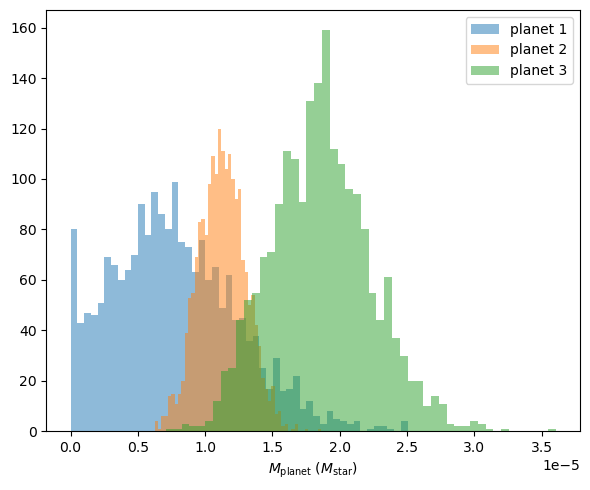

In [13]:
plot_histograms(analysis1, param='mass', nb_planets=n_planets)

Let's convert the units to something more intuitive.

Valid units are: "star" (default), "sun", "earth", "jup", or "SI"

Unit conversion applies to parameters "mass", "radius", or "density"

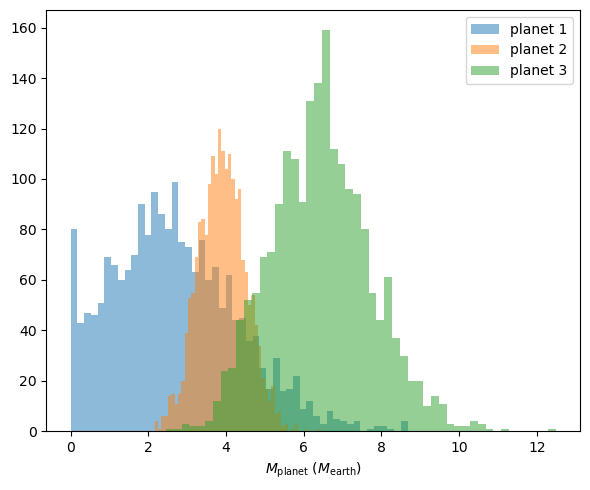

In [14]:
plot_histograms(analysis1, param='mass', nb_planets=n_planets, units='earth')

Let's now compare different parameters for two or more planets from the same analysis:

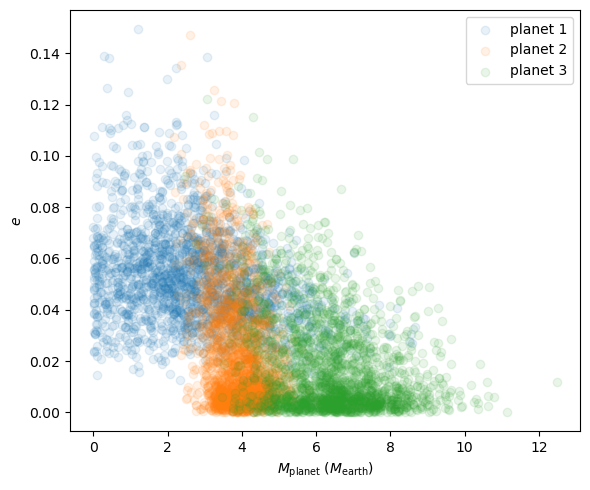

In [15]:
plot_samples(analysis1, x_param='mass', y_param='ecc', nb_planets=n_planets, units='earth')

It's perhaps more interesting to compare the samples for each planet across different analyses. 

The same functions above can also take the dictionaries as input:

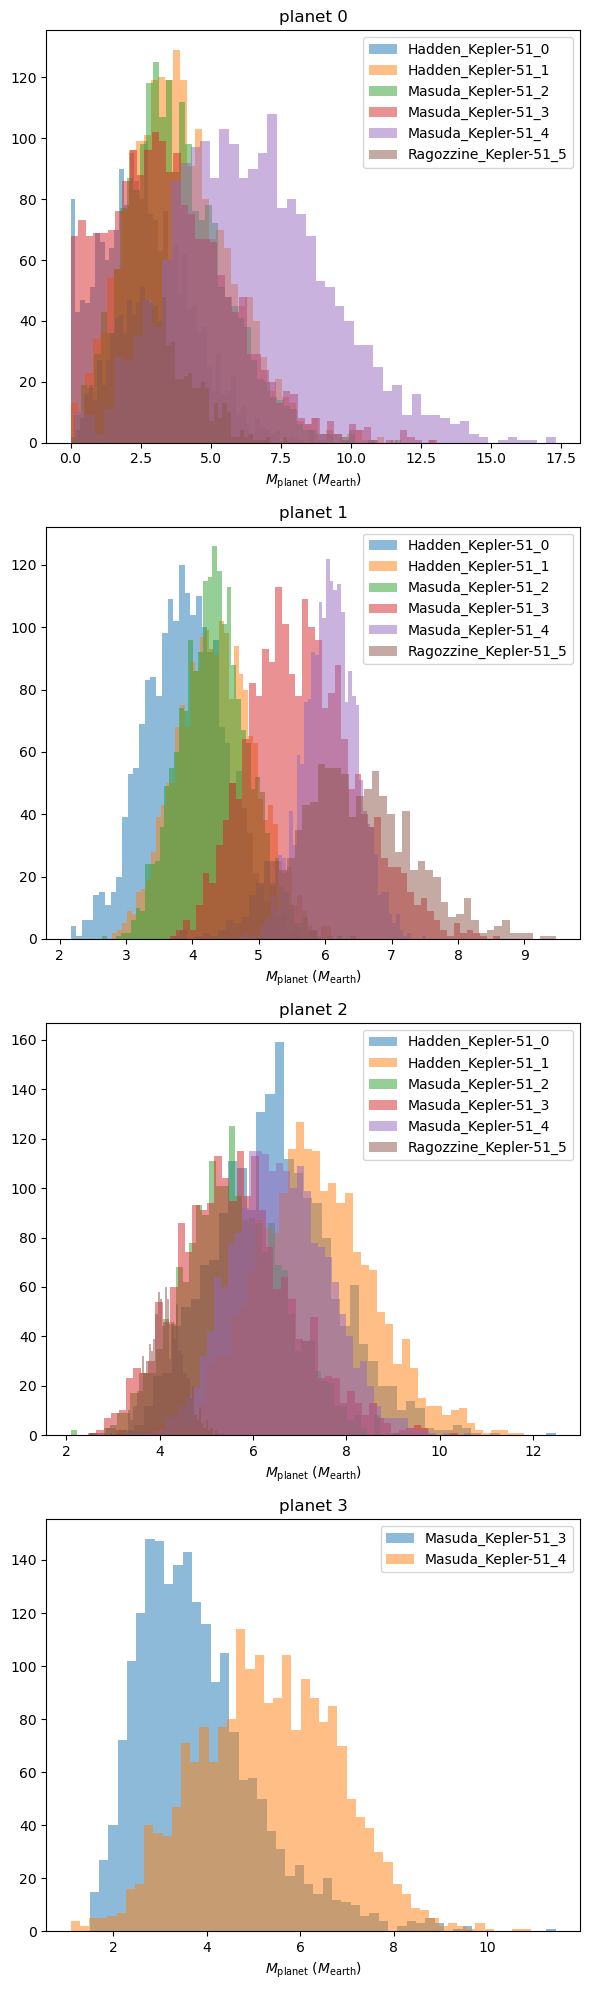

In [16]:
plot_histograms(dict_of_interest, param='mass', nb_planets=4, units='earth')

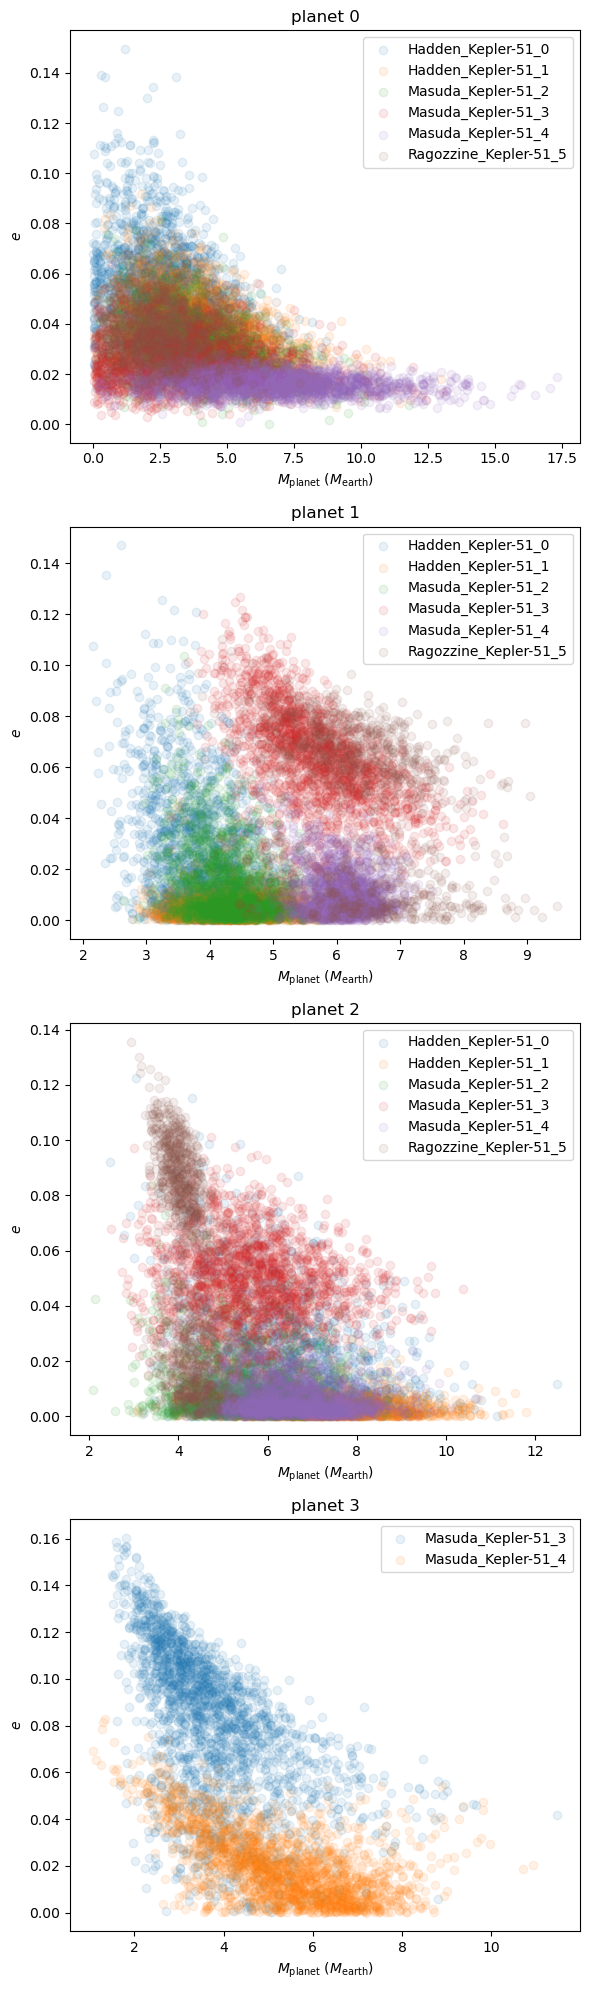

In [17]:
plot_samples(dict_of_interest, x_param='mass', y_param='ecc', nb_planets=4, units='earth')

Let's compare for example the mass-radius diagram for each planet. 

You can also set plot_media=True to plot the median and 1-sigma errorbars (with a small offset for clarity).

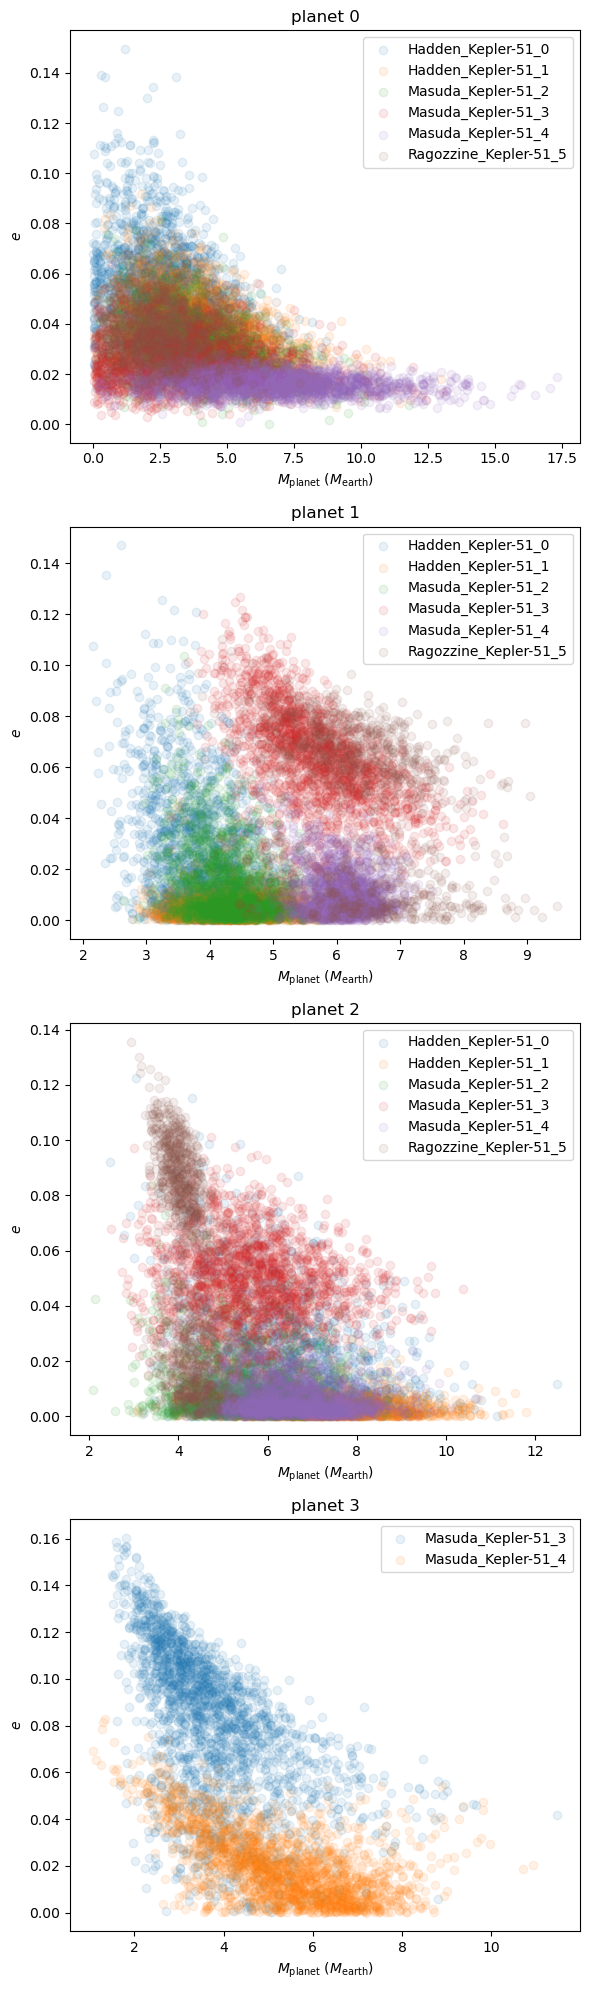

In [18]:
plot_samples(dict_of_interest, x_param='mass', y_param='ecc', nb_planets=4, units='earth', plot_median=False)

You might also be interested in the posterior distributions of consecutive planets:

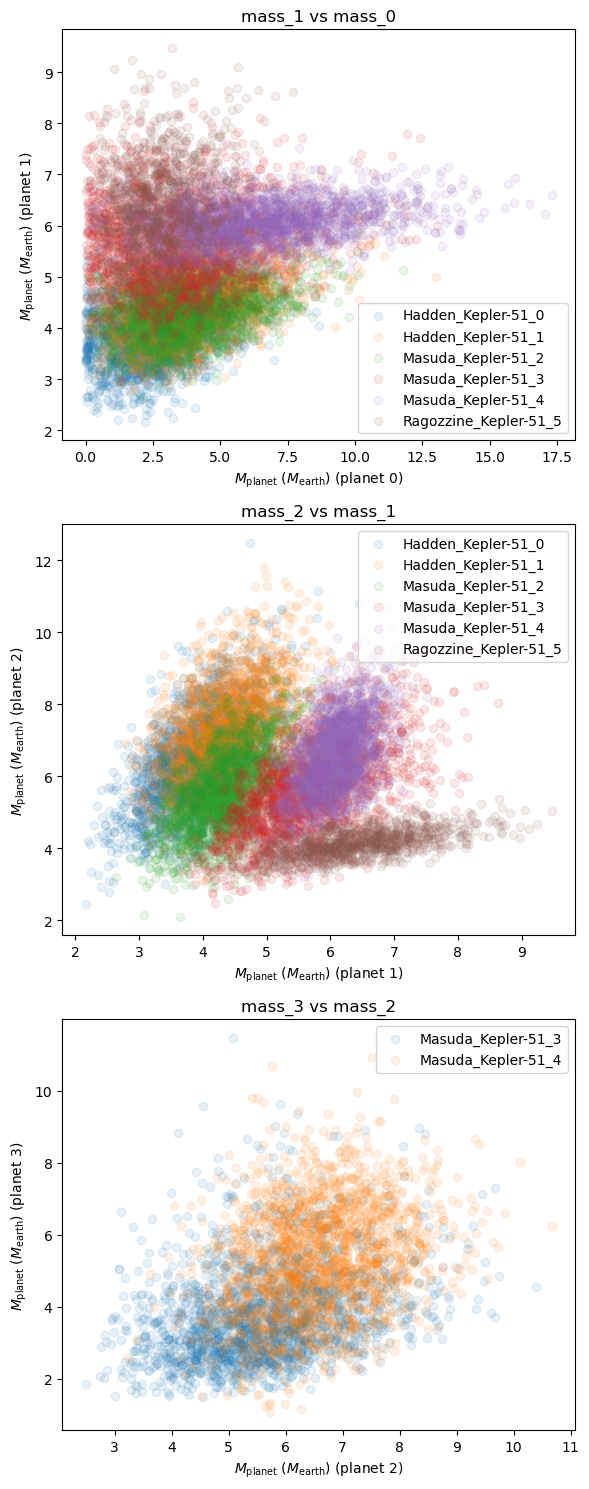

In [19]:
plot_consecutive_planets(dict_of_interest, 'mass', nb_planets=4, units='earth')

We can also compare the period ratios between consecutive planets:

We can filter out the outliers first:

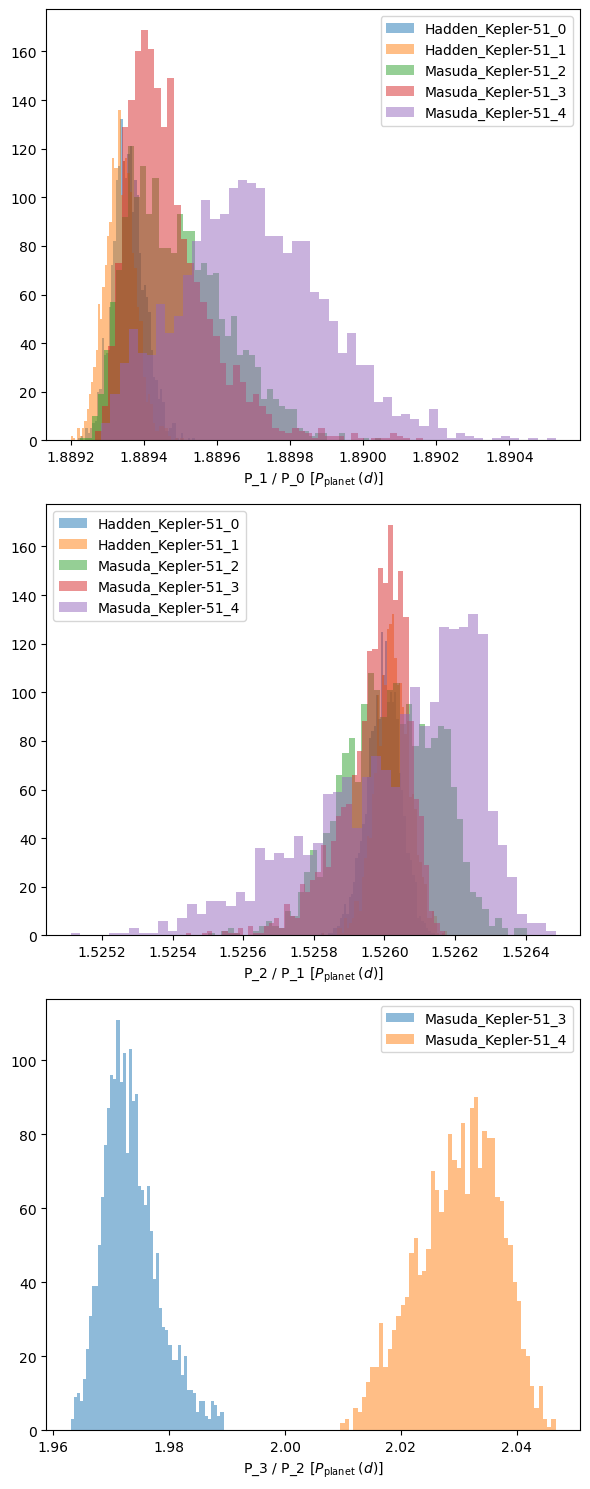

In [20]:
mask = df_of_interest['analysis_id'] < 5
dict1 = download_samples(df_of_interest[mask])
compare_period_ratios(dict1, nb_planets=4)

And look at the outlier separately:

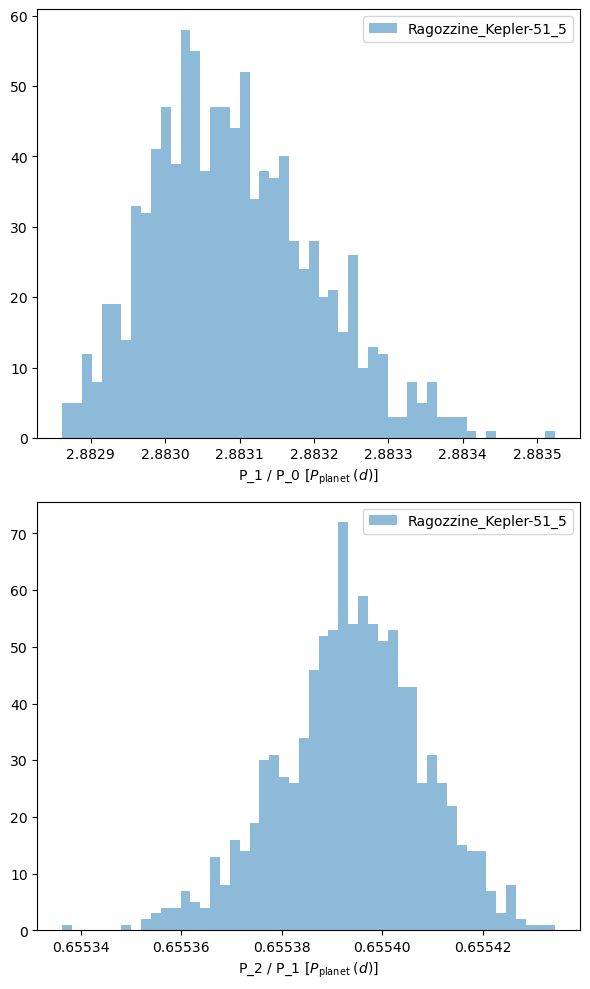

In [21]:
dict2 = download_samples(df_of_interest[~mask])
compare_period_ratios(dict2, nb_planets=n_planets)